In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
%matplotlib inline

/kaggle/input/szeged-weather/weatherHistory.csv


# 1. Import and and clean dataset.
Hypotesis. Correlation between temperature, humidity and aparent temperature.

In [2]:
df = pd.read_csv('/kaggle/input/szeged-weather/weatherHistory.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df = df.set_index(pd.to_datetime(df['Formatted Date']))
df = df.drop('Formatted Date', axis=1)
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
df = df[['Humidity', 'Temperature (C)', 'Apparent Temperature (C)', 'Wind Speed (km/h)']]
df = df.apply(zscore)
df.head()

,Humidity,Temperature (C),Apparent Temperature (C),Wind Speed (km/h)
Formatted Date,,,,
2006-04-01 00:00:00+02:00,0.793470,-0.257599,-0.324035,0.478635
2006-04-01 01:00:00+02:00,0.639996,-0.269814,-0.339097,0.499594
2006-04-01 02:00:00+02:00,0.793470,-0.267487,-0.138102,-0.995473
2006-04-01 03:00:00+02:00,0.486521,-0.381489,-0.459071,0.476306
2006-04-01 04:00:00+02:00,0.486521,-0.332631,-0.362469,0.033841


# 2. Data Analisys

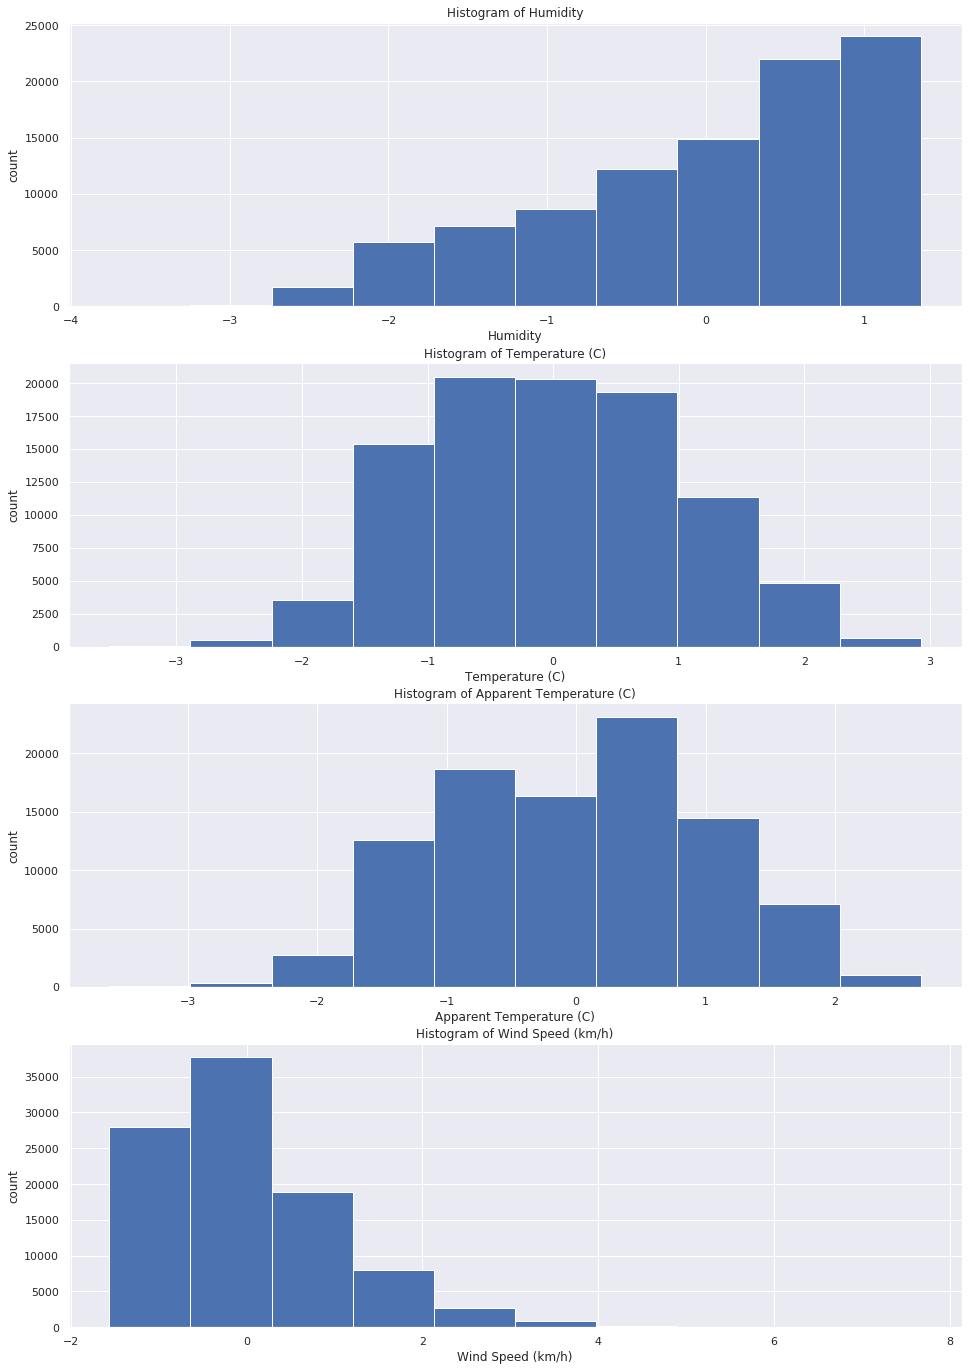

In [6]:
sns.set()
fig, axs = plt.subplots(4, 1, figsize=(16, 24))
count = 0
for column in ['Humidity', 'Temperature (C)', 'Apparent Temperature (C)', 'Wind Speed (km/h)']:
    axs[count].hist(df[column])
    axs[count].set_xlabel(column)
    axs[count].set_ylabel('count')
    axs[count].set_title('Histogram of {}'.format(column))
    count += 1
plt.show()

### 2.2 Dispersion analysis

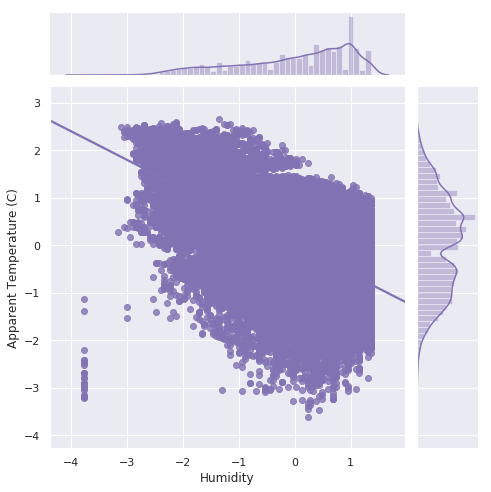

In [7]:
sns.set(style="darkgrid")
g = sns.jointplot("Humidity", "Apparent Temperature (C)", data=df, kind="reg", color="m", height=7)

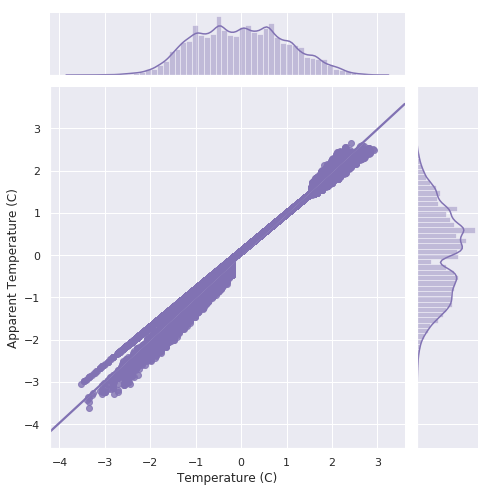

In [8]:
g = sns.jointplot("Temperature (C)", "Apparent Temperature (C)", data=df, kind="reg", color="m", height=7)

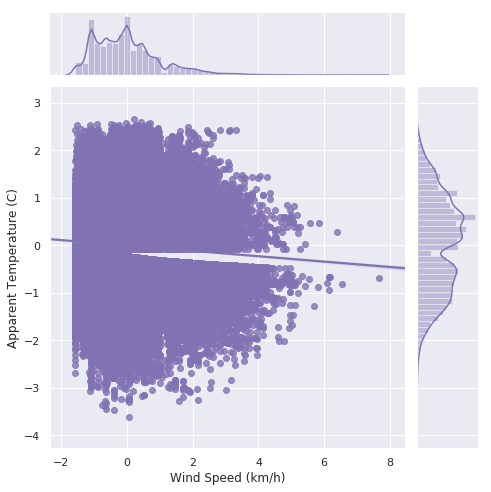

In [9]:
g = sns.jointplot("Wind Speed (km/h)", "Apparent Temperature (C)", data=df, kind="reg", color="m", height=7)

# 3. Inferential Statistics

Let's verify the R-squared value, we want the closes value to 1.

In [10]:
def model_summary(x_column, y_column):
    X = sm.add_constant(df[x_column])
    y = df[y_column]
    estimative = sm.OLS(y, X)
    model = estimative.fit()
    return model.summary()

## 3.1 Temperature x apparent Temperature

In [11]:
model_summary('Temperature (C)', 'Apparent Temperature (C)')

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.985
Model:                                  OLS   Adj. R-squared:                  0.985
Method:                       Least Squares   F-statistic:                 6.470e+06
Date:                      Thu, 13 Feb 2020   Prob (F-statistic):               0.00
Time:                              03:38:04   Log-Likelihood:                 66688.
No. Observations:                     96453   AIC:                        -1.334e+05
Df Residuals:                         96451   BIC:                        -1.334e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -7.633e-17      0.000  -1.96e-13      1.000      -0.001       0.001
Temperature (C)     0.9926      0.000   2543.612      0.000       0.992       0.993
==============================================================================
Omnibus:                     4226.905   Durbin-Watson:                   0.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5588.617
Skew:                          -0.449   Prob(JB):                         0.00
Kurtosis:                       3.763   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3.2 Humidity x Apparent Temperature

In [12]:
model_summary('Humidity', 'Apparent Temperature (C)')

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.363
Model:                                  OLS   Adj. R-squared:                  0.363
Method:                       Least Squares   F-statistic:                 5.499e+04
Date:                      Thu, 13 Feb 2020   Prob (F-statistic):               0.00
Time:                              03:38:04   Log-Likelihood:            -1.1510e+05
No. Observations:                     96453   AIC:                         2.302e+05
Df Residuals:                         96451   BIC:                         2.302e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.633e-17      0.003  -2.97e-14      1.000      -0.005       0.005
Humidity      -0.6026      0.003   -234.489      0.000      -0.608      -0.598
==============================================================================
Omnibus:                     3365.837   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3727.020
Skew:                          -0.476   Prob(JB):                         0.00
Kurtosis:                       3.144   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3.3 Wind speed x Apparent Temperature

In [13]:
model_summary('Wind Speed (km/h)', 'Apparent Temperature (C)')

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.003
Model:                                  OLS   Adj. R-squared:                  0.003
Method:                       Least Squares   F-statistic:                     310.5
Date:                      Thu, 13 Feb 2020   Prob (F-statistic):           2.16e-69
Time:                              03:38:04   Log-Likelihood:            -1.3671e+05
No. Observations:                     96453   AIC:                         2.734e+05
Df Residuals:                         96451   BIC:                         2.734e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7.633e-17      0.003  -2.37e-14      1.000      -0.006       0.006
Wind Speed (km/h)    -0.0566      0.003    -17.622      0.000      -0.063      -0.050
==============================================================================
Omnibus:                     5193.066   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2018.644
Skew:                          -0.047   Prob(JB):                         0.00
Kurtosis:                       2.298   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3.4 Regression with temperature and humidity

In [14]:
X = df[['Temperature (C)', 'Humidity']]
y = df['Apparent Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
linear_regression = LinearRegression().fit(X_train, y_train)
y_pred_test = linear_regression.predict(X_test)

R2 Score train

In [15]:
linear_regression.score(X_train,y_train)

0.9864514566549175

R2 Score test

In [16]:
linear_regression.score(X_test,y_test)

0.9859639492257125

Mean Square error

In [17]:
mean_squared_error(y_test, y_pred_test)

0.014018502756502509

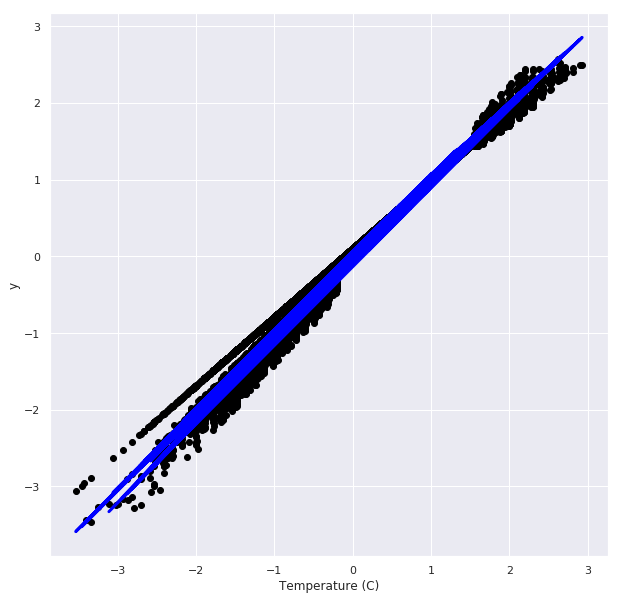

In [18]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(X_test['Temperature (C)'], y_test,  color='black')
plt.plot(X_test['Temperature (C)'], y_pred_test, color='blue', linewidth=3)
plt.xlabel('Temperature (C)')
plt.ylabel("y")
plt.show()